<a href="https://colab.research.google.com/github/arkajyotiMukherjee/tensorflow_docs_prac/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

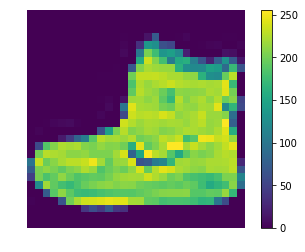

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.axis('off')
plt.show()

In [0]:
# reshape images
train_images, test_images = train_images/255.0, test_images/255.0

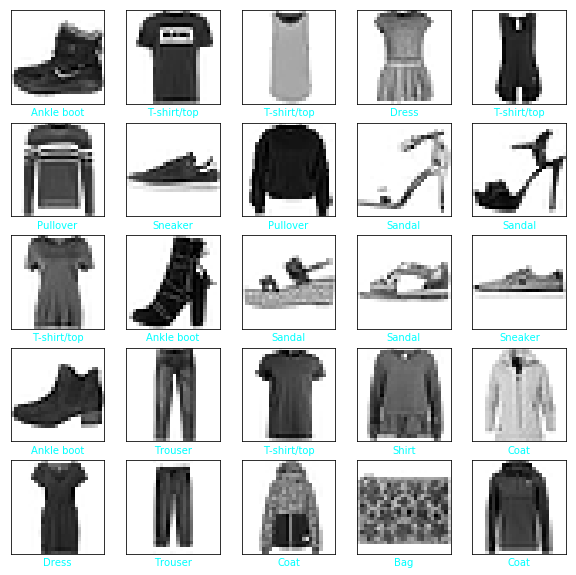

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]], color='cyan')
plt.show()
  

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)

W0710 09:12:39.882818 139711411447680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5030 - accuracy: 0.8238
Epoch 2/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3750 - accuracy: 0.8653
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3380 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3118 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2951 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2804 - accuracy: 0.8953
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2693 - accuracy: 0.8988
Epoch 8/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2589 - accuracy: 0.9030
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2495 - accuracy: 0.9074
Epoch 10/10
60

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3333 - accuracy: 0.8807


In [12]:
predictions = model.predict(test_images)

print(predictions[0])
print('Test prediction: ',np.argmax(predictions[0]), '\nActual label: ', test_labels[0])

[2.8534936e-07 2.3559221e-10 3.3148331e-09 8.7816743e-10 1.7191291e-09
 3.5288095e-02 8.2502574e-08 6.1945785e-03 5.2417725e-08 9.5851696e-01]
Test prediction:  9 
Actual label:  9


In [0]:
def plot_image(i, predictions, true_labels, img):
  pred, true_label, img = predictions[i], true_labels[i], img[i]
  
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  
  pred_label = np.argmax(pred)
  color = 'cyan' if pred_label == true_label else 'red'
  
  plt.xlabel("{} {:2.0f} ({})".format(class_names[pred_label],
                                     100*np.max(pred),
                                     class_names[true_label]),
            color=color)
  

def plot_value_array(i, pred, true_label):
  pred, true_label = pred[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  bar_plot = plt.bar(range(10), pred, color="#777777")
  plt.ylim([0,1])
  pred_label = np.argmax(pred)
  
  bar_plot[pred_label].set_color('red')
  bar_plot[true_label].set_color('blue')

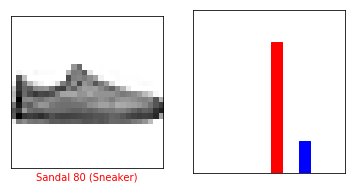

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

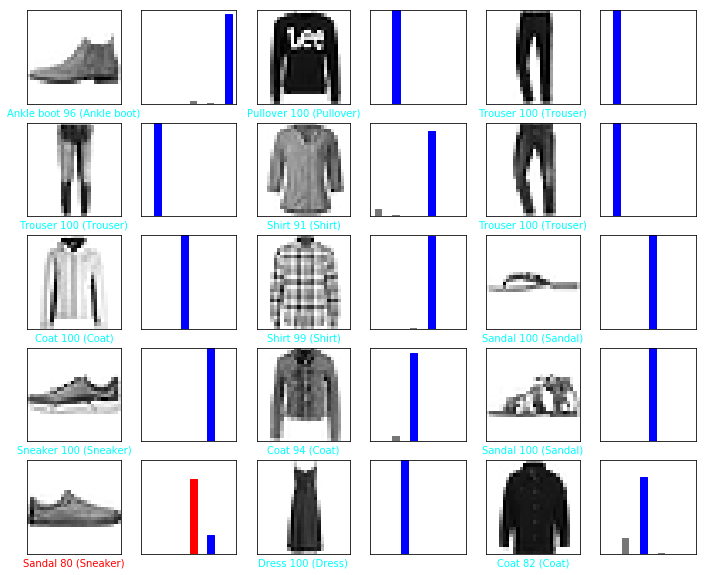

In [15]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions,  test_labels)
plt.show()

In [16]:
img = test_images[0]
img = np.expand_dims(img,0)

print(img.shape)

(1, 28, 28)


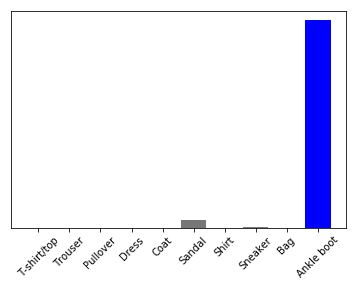

In [17]:
pred_single = model.predict(img)

plot_value_array(0, pred_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)